### Import libraries

In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb2hex

import sys
sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_class_colors, show_1D_umap, show_2D_umap, show_3D_umap

2022-10-31 13:01:19.035938: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Load training data

In [2]:
training_data_path = pathlib.Path("../3.normalize_data/normalized_data/training_data.csv.gz")
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)

metadata_dataframe, feature_data = split_data(training_data)
phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]

training_data

,Mitocheck_Phenotypic_Class,Object_Outline,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,Large,[[396 595]\n [395 596]\n [394 596]\n [393 596]...,397.288288,618.558559,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,1.527232,-0.388696,-0.715081,-0.939058,-0.079103,1.966414,18.714635,0.061156,2.639598,-0.085996
1,Large,[[361 563]\n [360 564]\n [359 564]\n [358 564]...,359.535714,585.062500,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,-0.483285,-1.355129,-0.857182,-0.934520,0.724273,2.254263,-0.564988,1.629091,-0.606195,-0.747432
2,Large,[[379 662]\n [378 663]\n [377 663]\n [376 663]...,383.282051,685.222222,LT0010_27,173,83,1,LT0010_27_173,LT0010_27/LT0010_27_173_83.tif,...,0.888509,1.351147,-0.648786,0.264769,0.131170,0.679198,0.172281,0.341971,-0.582500,0.506617
3,Large,[[923 515]\n [922 516]\n [921 516]\n [920 516]...,934.568807,534.385321,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,-1.424769,-0.863939,-0.582677,-0.228617,0.426065,1.906163,0.193329,0.909489,-1.723110,0.955596
4,Large,[[483 96]\n [482 97]\n [481 97]\n [480 98]...,481.007143,121.978571,LT0013_38,42,75,1,LT0013_38_42,LT0013_38/LT0013_38_42_75.tif,...,0.693119,-0.581144,-0.256527,-1.401117,-0.357608,2.607508,6.506821,-1.335764,-0.264039,0.978577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,OutOfFocus,[[382 185]\n [381 186]\n [380 186]\n [379 186]...,383.075269,220.198925,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,...,0.525202,8.110262,1.777901,-1.512628,-0.225867,-1.612982,-0.679415,-2.581475,0.501395,1.981009
2915,OutOfFocus,[[975 277]\n [974 278]\n [973 278]\n [972 278]...,975.747253,293.868132,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.277908,5.959773,2.362540,-1.000032,-0.723652,-1.460720,-1.919148,-0.301130,0.779582,3.084642
2916,OutOfFocus,[[907 280]\n [906 281]\n [905 281]\n [904 281]...,898.614815,302.407407,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,0.553313,10.086836,1.170072,-1.317000,-0.994644,-1.406541,-0.104613,-0.056216,0.714624,1.612470
2917,OutOfFocus,[[944 267]\n [943 268]\n [942 268]\n [941 268]...,946.758621,281.689655,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,...,-0.152000,11.078217,2.460915,-0.989282,-1.141723,-1.424882,-2.959780,-1.999795,0.702134,2.306039


### Set UMAP display settings, save directory

In [3]:
point_size = 25
alpha = 0.6
color_palette = "bright"

save_dir = pathlib.Path("umaps/")
save_dir.mkdir(exist_ok=True, parents=True)

### Set class colors

In [4]:
training_data["Mitocheck_Phenotypic_Class"].unique().tolist()

['Large',
 'Prometaphase',
 'Grape',
 'Interphase',
 'Apoptosis',
 'ADCCM',
 'Folded',
 'SmallIrregular',
 'Polylobed',
 'Metaphase',
 'Binuclear',
 'Hole',
 'Anaphase',
 'MetaphaseAlignment',
 'Elongated',
 'OutOfFocus']

In [5]:
classes_1 = [
    "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    "Folded",
    "SmallIrregular",
    "Polylobed",
    "Metaphase",
    "Binuclear",
    "Hole",
    "Anaphase",
    "MetaphaseAlignment",
    "Elongated",
    "OutOfFocus",
]

classes_2 = [
    # "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    # "Folded",
    # "SmallIrregular",
    # "Polylobed",
    # "Metaphase",
    # "Binuclear",
    # "Hole",
    # "Anaphase",
    # "MetaphaseAlignment",
    # "Elongated",
    # "OutOfFocus",
]

class_colors_1 = get_class_colors(classes_1, "rainbow")
class_colors_2 = get_class_colors(classes_2, "bright")

class_colors_2

{'Prometaphase': '#023eff',
 'Grape': '#ff7c00',
 'Interphase': '#1ac938',
 'Apoptosis': '#e8000b',
 'ADCCM': '#8b2be2'}

### 1D UMAP

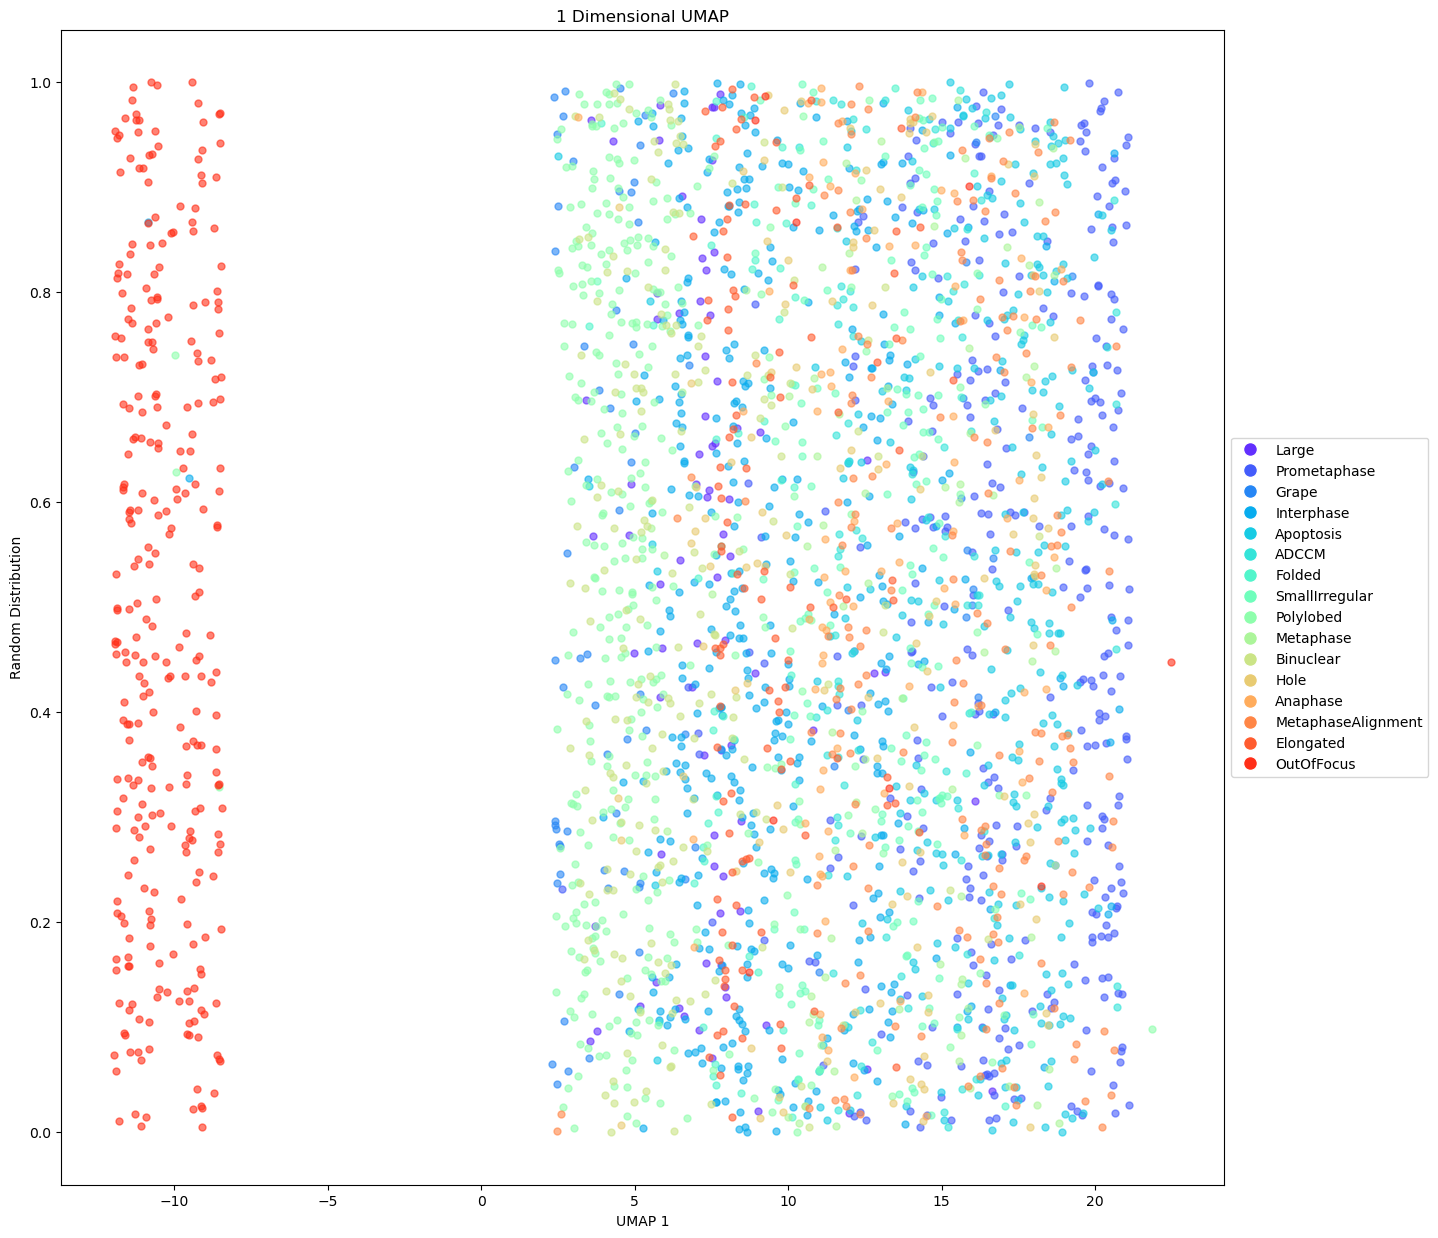

In [6]:
umap_1D_save_path = pathlib.Path(f"{save_dir}/norm_train_1D_umap.png")
show_1D_umap(feature_data, phenotypic_classes, class_colors_1, save_path=umap_1D_save_path, point_size=point_size, alpha=alpha)

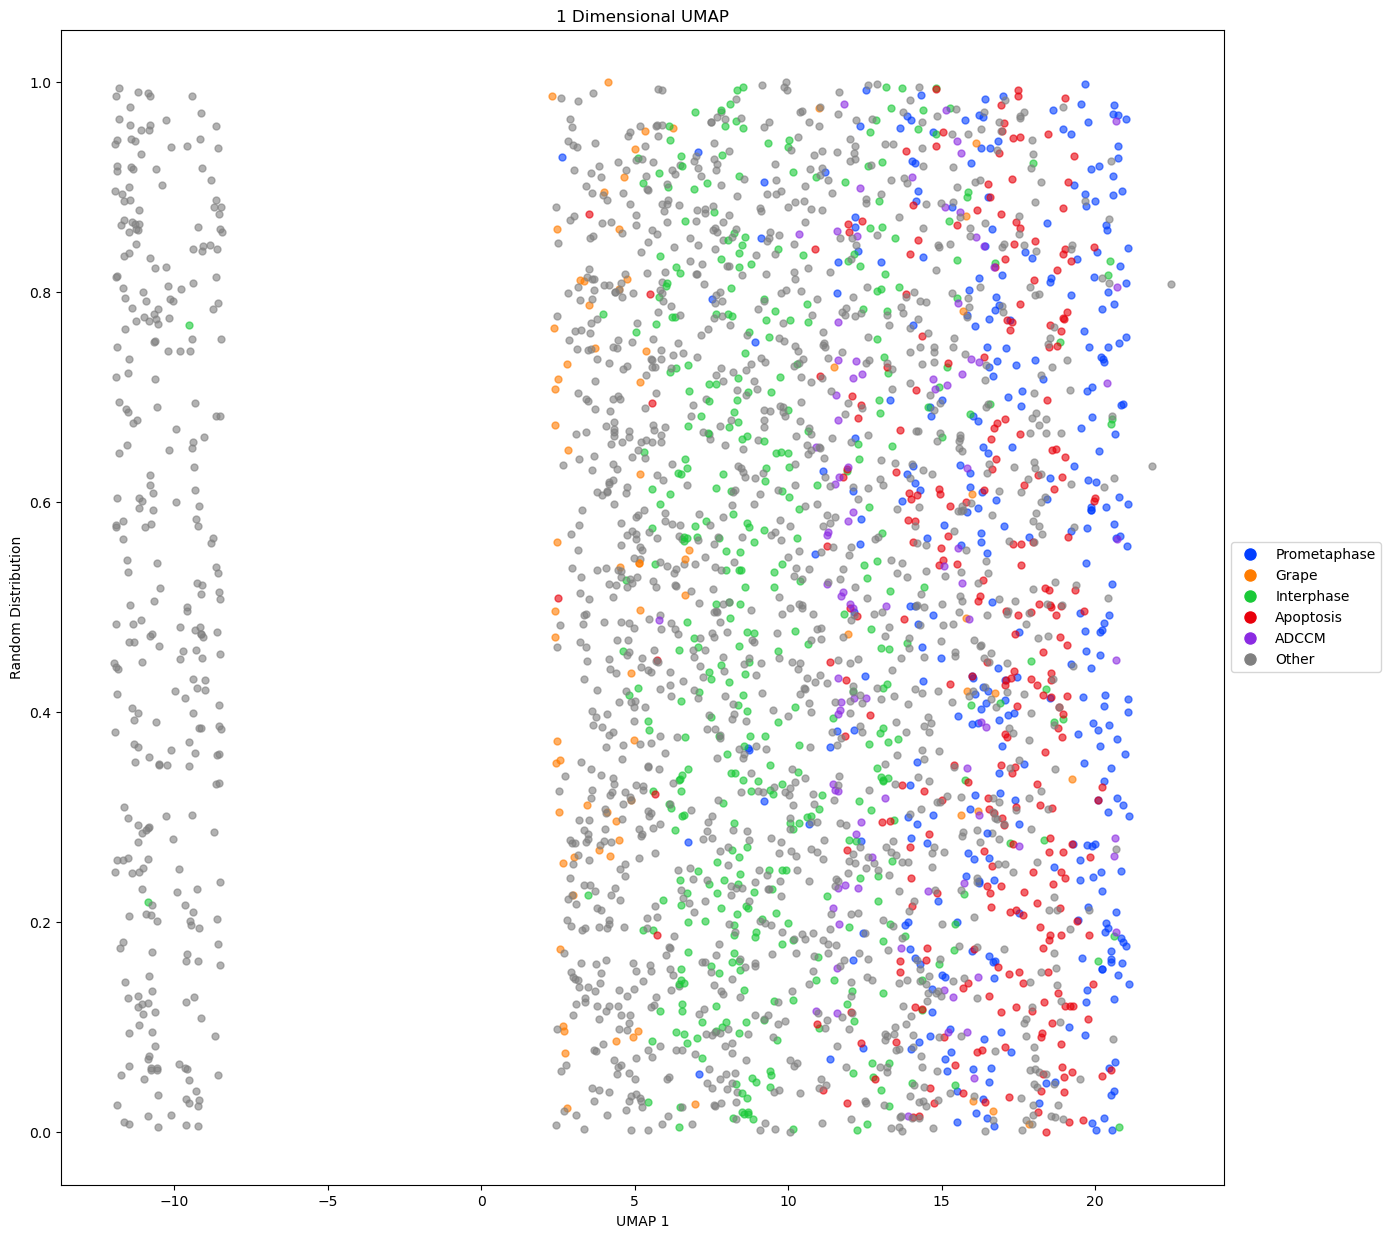

In [7]:
umap_1D_save_path = pathlib.Path(f"{save_dir}/norm_train_1D_umap_other.png")
show_1D_umap(feature_data, phenotypic_classes, class_colors_2, save_path=umap_1D_save_path, point_size=point_size, alpha=alpha)

### 2D UMAP

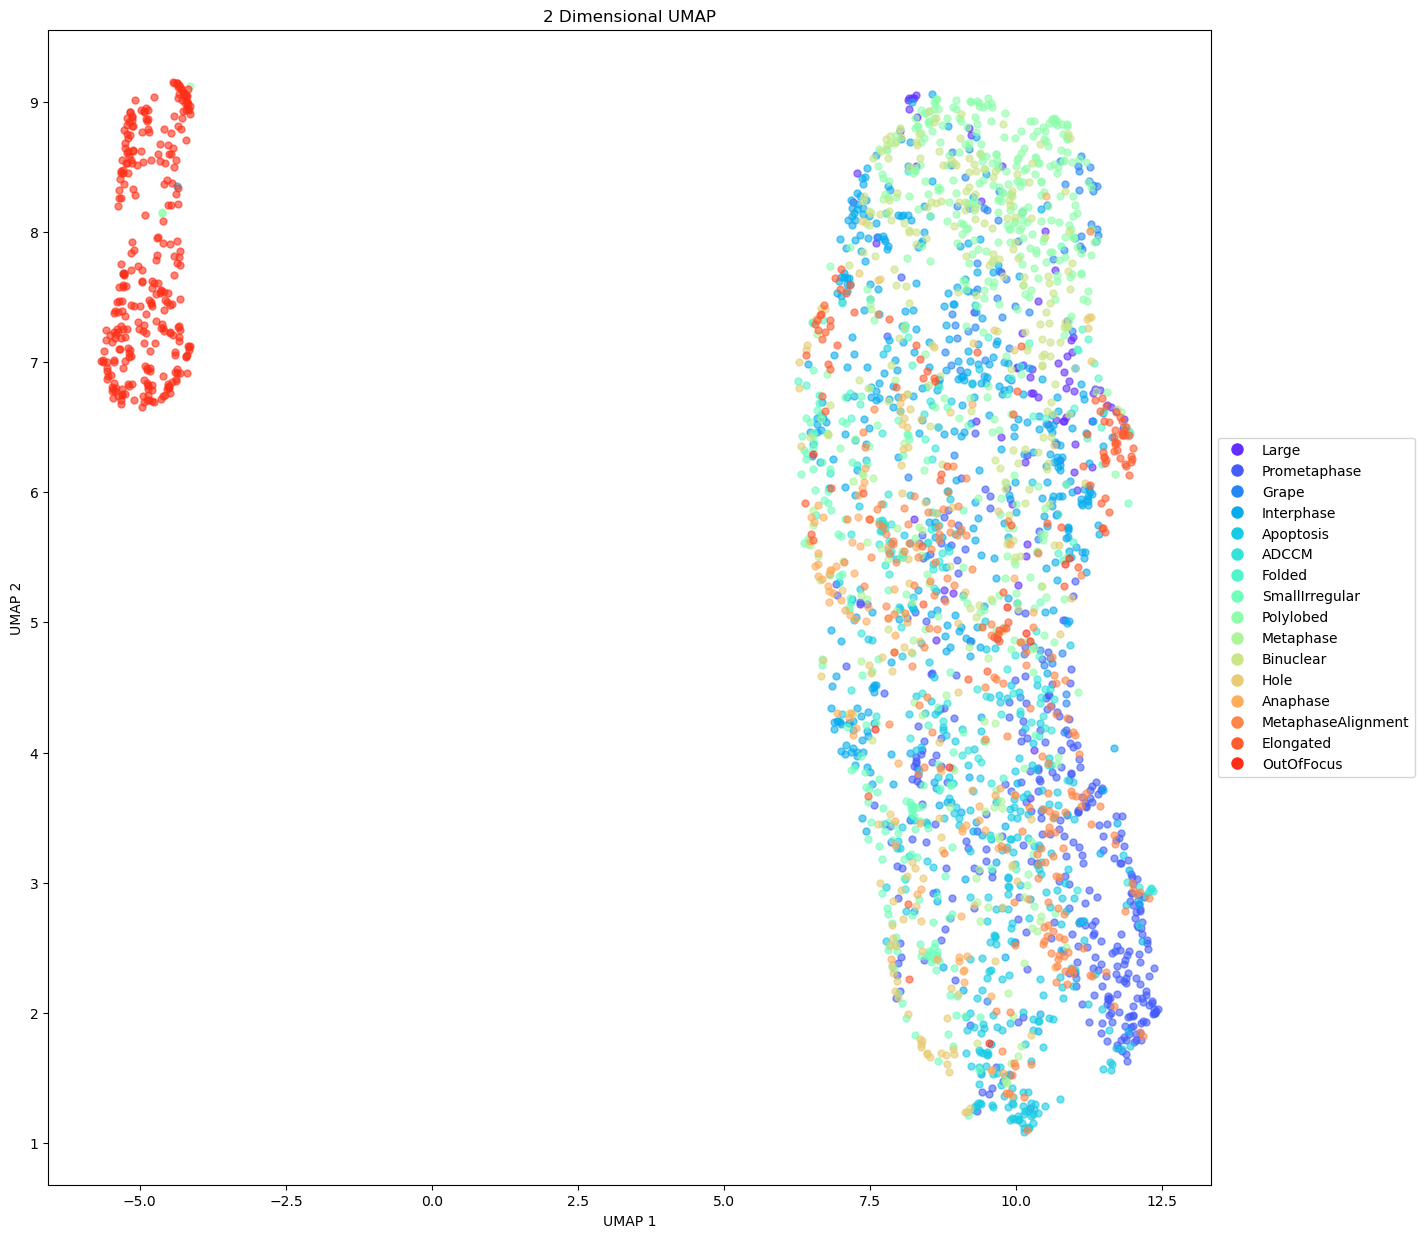

In [8]:
umap_2D_save_path = pathlib.Path(f"{save_dir}/norm_train_2D_umap.png")
show_2D_umap(feature_data, phenotypic_classes, class_colors_1, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha)

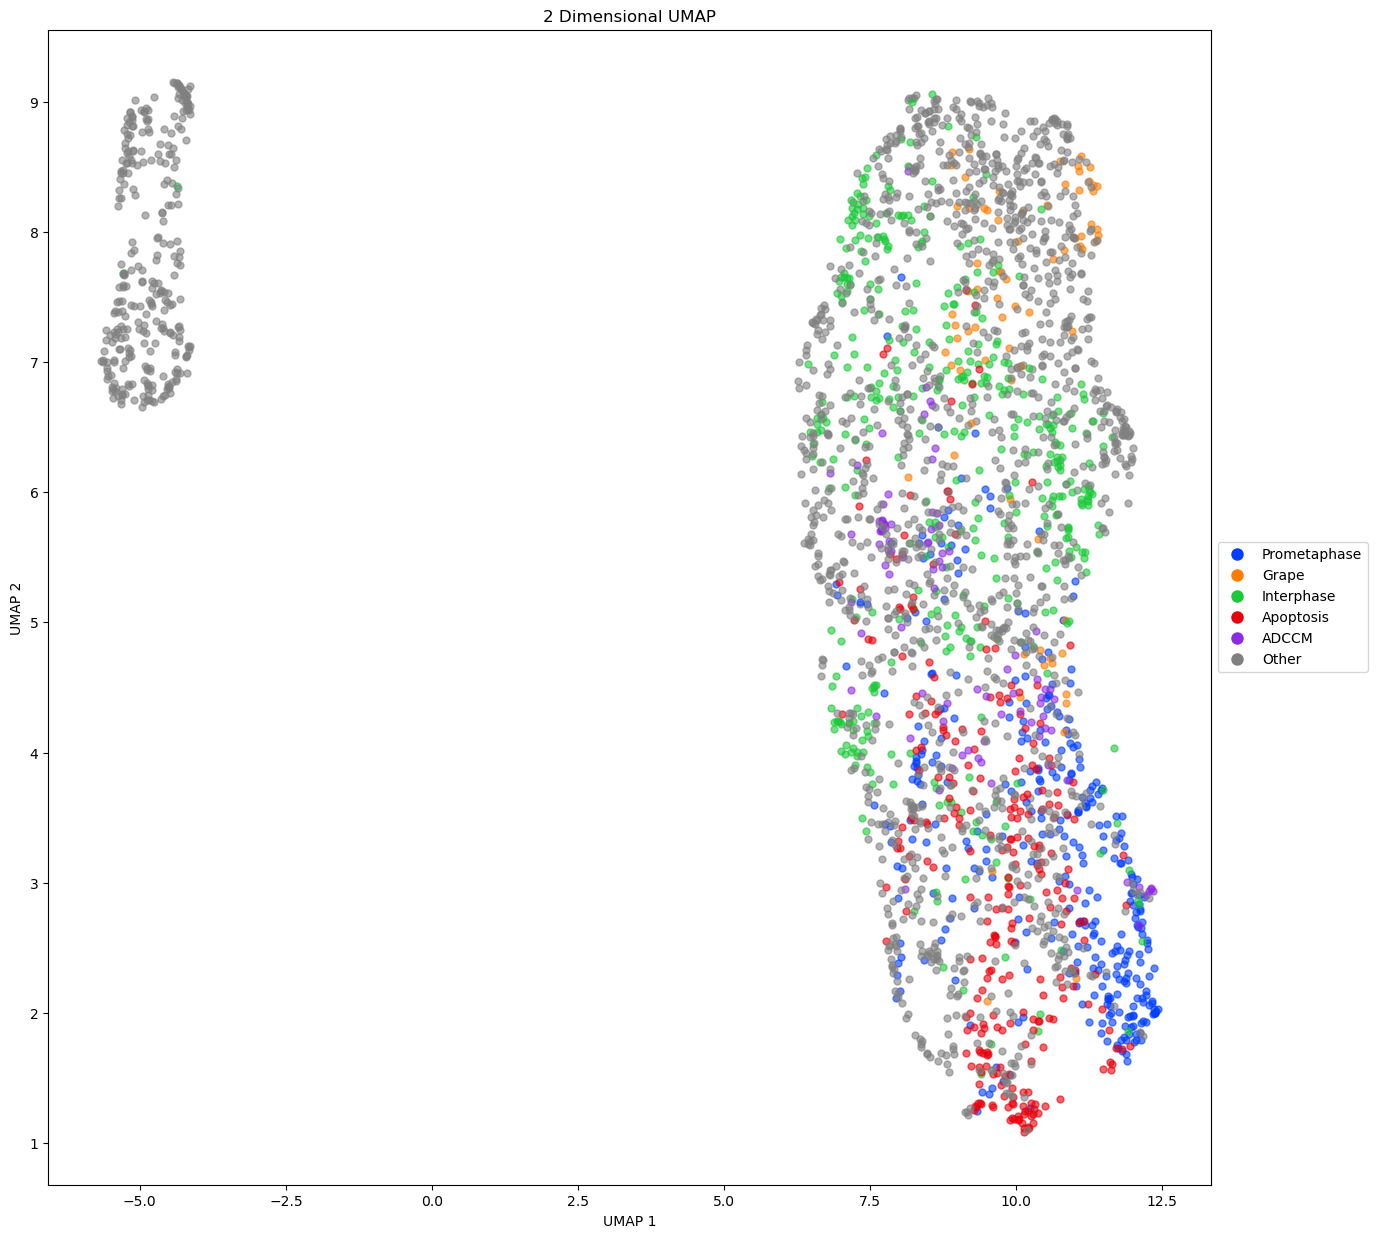

In [9]:
umap_2D_save_path = pathlib.Path(f"{save_dir}/norm_train_2D_umap_other.png")
show_2D_umap(feature_data, phenotypic_classes, class_colors_2, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha)

### 3D UMAP

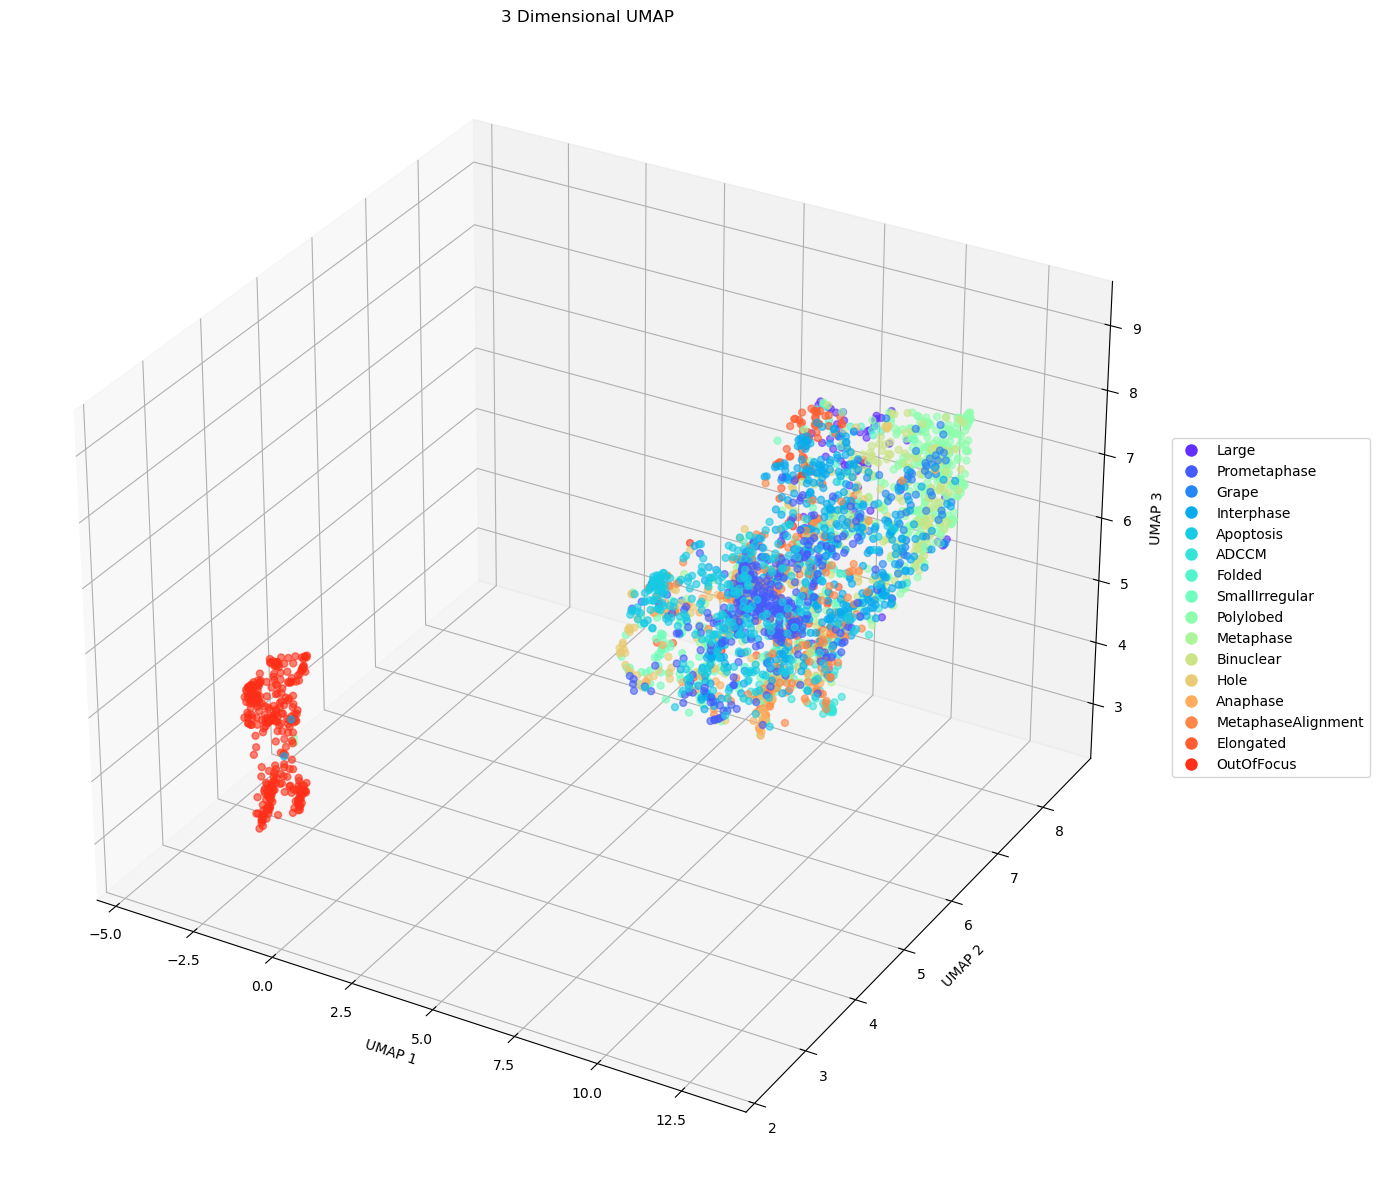

In [10]:
umap_3D_save_path = pathlib.Path(f"{save_dir}/norm_train_3D_umap.png")
show_3D_umap(feature_data, phenotypic_classes, class_colors_1, save_path=umap_3D_save_path, point_size=point_size, alpha=alpha)

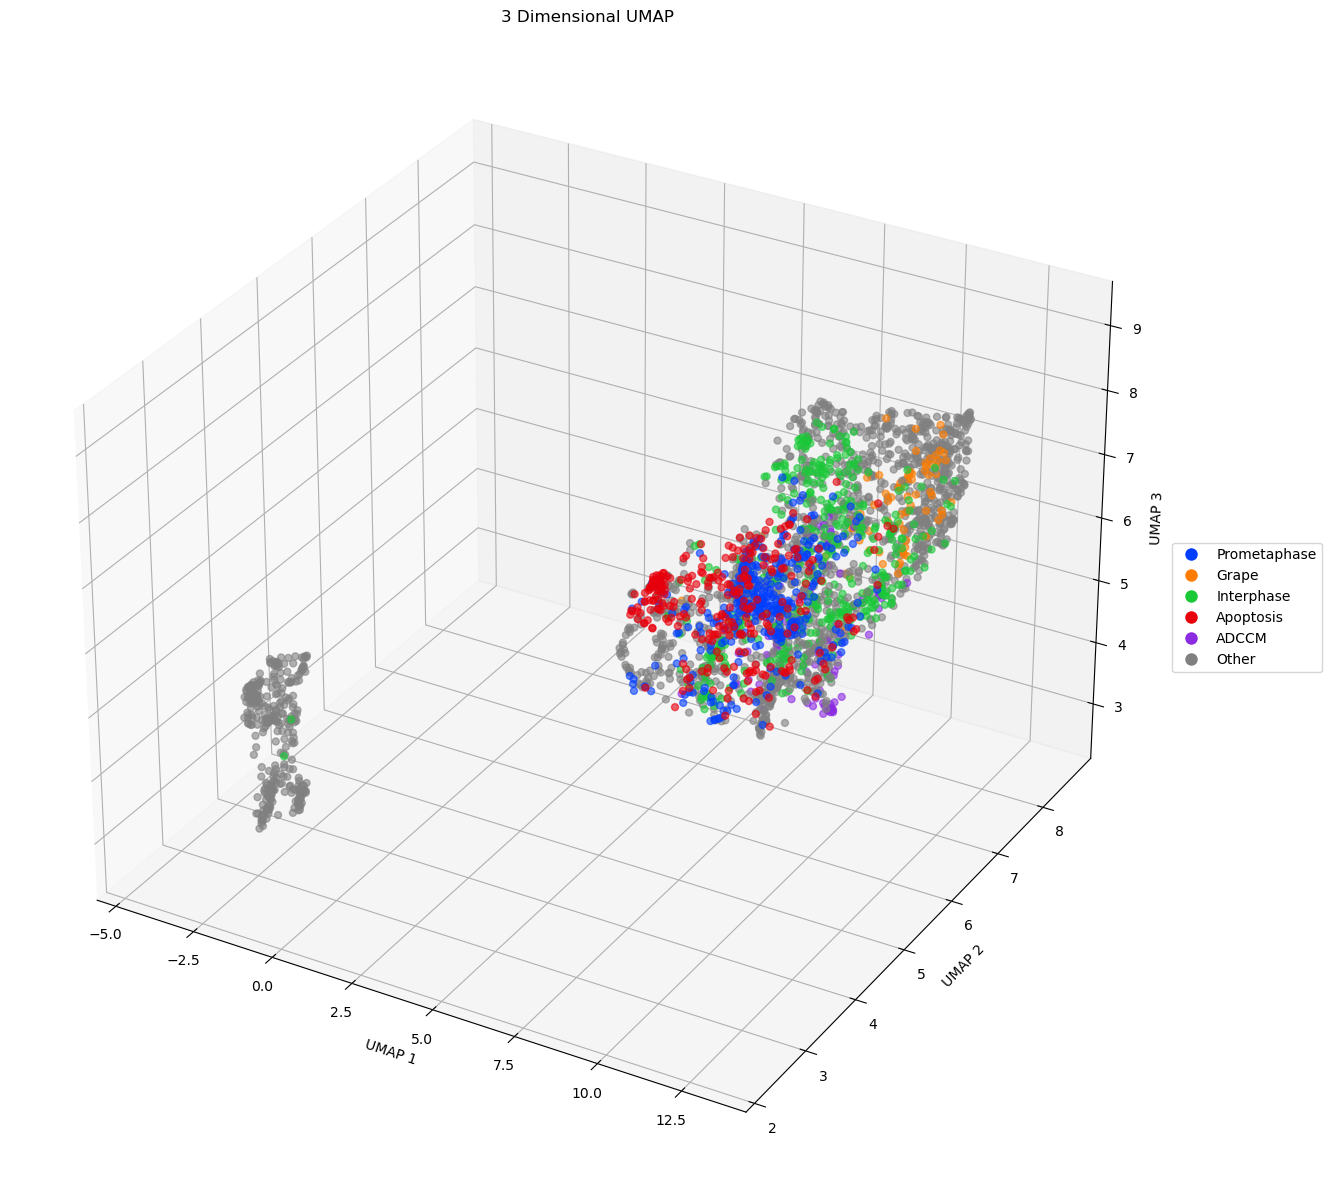

In [11]:
umap_3D_save_path = pathlib.Path(f"{save_dir}/norm_train_3D_umap_other.png")
show_3D_umap(feature_data, phenotypic_classes, class_colors_2, save_path=umap_3D_save_path, point_size=point_size, alpha=alpha)